It seems that by the way Kaan Can is organizing the notebook, he writes out all the things that he wants answered from the dataset. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

In [3]:
from subprocess import check_output
print(check_output(['ls','../Seaborn Tutorials']).decode("utf8"))

MedianHouseholdIncome2015.csv
PercentOver25CompletedHighSchool.csv
PercentagePeopleBelowPovertyLevel.csv
PoliceKillingsUS.csv
Seaborn Tutorial by Kann Can.ipynb
ShareRaceByCity.csv



In [8]:
# Read dates 
median_house_hold_in_come=pd.read_csv("../Seaborn Tutorials/MedianHouseholdIncome2015.csv",
                                     encoding="windows-1252")
percentage_people_below_poverty_level=pd.read_csv("../Seaborn Tutorials/PercentagePeopleBelowPovertyLevel.csv",
                                     encoding="windows-1252")
percent_over_25_completed_highSchool = pd.read_csv('../Seaborn Tutorials/PercentOver25CompletedHighSchool.csv', encoding="windows-1252")
share_race_city = pd.read_csv('../Seaborn Tutorials/ShareRaceByCity.csv', encoding="windows-1252")
kill = pd.read_csv('../Seaborn Tutorials/PoliceKillingsUS.csv', encoding="windows-1252")

# What's with the encoding of windows-1252

In [9]:
median_house_hold_in_come.head()

,Geographic Area,City,Median Income
0,AL,Abanda CDP,11207
1,AL,Abbeville city,25615
2,AL,Adamsville city,42575
3,AL,Addison town,37083
4,AL,Akron town,21667


In [23]:
median_house_hold_in_come["Geographic Area"].value_counts()[:10]
#value_counts is a Series method rather than a DataFrame method 
#(and you are trying to use it on a DataFrame, clean). 

PA    1762
TX    1747
CA    1522
IL    1368
OH    1215
NY    1196
MO    1033
IA    1008
FL     918
MN     903
Name: Geographic Area, dtype: int64

In [24]:
percentage_people_below_poverty_level.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [25]:
percentage_people_below_poverty_level.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
Geographic Area    29329 non-null object
City               29329 non-null object
poverty_rate       29329 non-null object
dtypes: object(3)
memory usage: 687.5+ KB


In [26]:
percent_over_25_completed_highSchool.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [27]:
share_race_city.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [28]:
share_race_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
Geographic area          29268 non-null object
City                     29268 non-null object
share_white              29268 non-null object
share_black              29268 non-null object
share_native_american    29268 non-null object
share_asian              29268 non-null object
share_hispanic           29268 non-null object
dtypes: object(7)
memory usage: 1.6+ MB


In [29]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [30]:
kill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
id                         2535 non-null int64
name                       2535 non-null object
date                       2535 non-null object
manner_of_death            2535 non-null object
armed                      2526 non-null object
age                        2458 non-null float64
gender                     2535 non-null object
race                       2340 non-null object
city                       2535 non-null object
state                      2535 non-null object
signs_of_mental_illness    2535 non-null bool
threat_level               2535 non-null object
flee                       2470 non-null object
body_camera                2535 non-null bool
dtypes: bool(2), float64(1), int64(1), object(10)
memory usage: 242.7+ KB


It seems that most of the numerical data have been encoded as strings. 

In [32]:
#Poverty Rate of each state
percentage_people_below_poverty_level.poverty_rate.replace(['-'],0.0,inplace=True)
percentage_people_below_poverty_level.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [33]:
#change the data type from string to numbers
percentage_people_below_poverty_level.poverty_rate=percentage_people_below_poverty_level.poverty_rate.astype(float)

In [34]:
area_list=list(percentage_people_below_poverty_level["Geographic Area"].unique())

In [53]:
area_poverty_ratio=percentage_people_below_poverty_level.groupby('Geographic Area').mean()
data=area_poverty_ratio 
data.columns=["area_poverty_ratio"]
data.index.names=["area_list"]
data.head()
#This returns the average poverty ratio of each geo

,area_poverty_ratio
area_list,
AK,18.678592
AL,20.611795
AR,22.963216
AZ,25.268071
CA,16.888371


In [57]:
new_index=(data["area_poverty_ratio"].sort_values(ascending=False)).index.values
# It is curious that this was used to create a new index for the dataframe
#After new index is created, the sorted data is created as a new data frame
sorted_data=data.reindex(new_index)
sorted_data.head()

,area_poverty_ratio
area_list,
MS,26.884254
AZ,25.268071
GA,23.663636
AR,22.963216
NM,22.507675


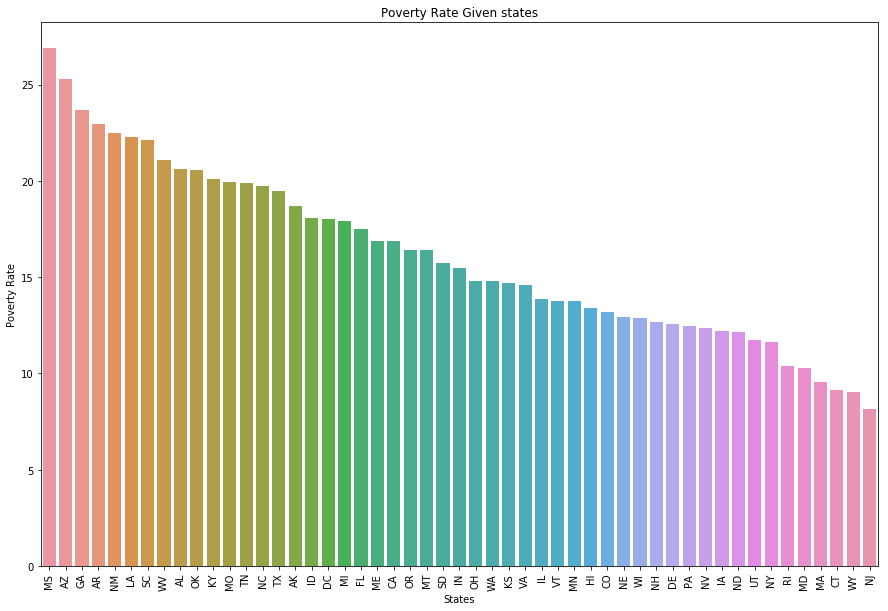

In [62]:
#Plotting everything
plt.figure(figsize=(15,10))
ax=sns.barplot(x=sorted_data.index,y=sorted_data["area_poverty_ratio"])
plt.xticks(rotation=90)
plt.xlabel("States")
plt.ylabel("Poverty Rate")
plt.title("Poverty Rate Given states")
plt.show()
#What's this automatic Rainbow coloring

In [74]:
# Most Common Names or Surnames of killed people 
separate=kill.name[kill.name != "TK TK"].str.split()
a,b=zip(*separate) #This is reverse zipping
# This text/string manipulation is interesting 
name_list=a+b #Don't know how I feel about this, this is adding two lists together
name_list[:10]
name_count=Counter(name_list)#Tuple can't be applied with value counts
most_common_names=name_count.most_common(15) #numpy array has most common methods

In [75]:
most_common_names

[('Michael', 91),
 ('David', 57),
 ('James', 56),
 ('Robert', 48),
 ('Joseph', 48),
 ('William', 47),
 ('Daniel', 46),
 ('John', 42),
 ('Christopher', 40),
 ('Lee', 37),
 ('Richard', 36),
 ('J.', 32),
 ('Anthony', 31),
 ('Jose', 28),
 ('Joshua', 28)]

In [76]:
x,y=zip(*most_common_names)
x,y=list(x),list(y)

Text(0.5,1,'Most Common 15 names or surnames of killed persons')

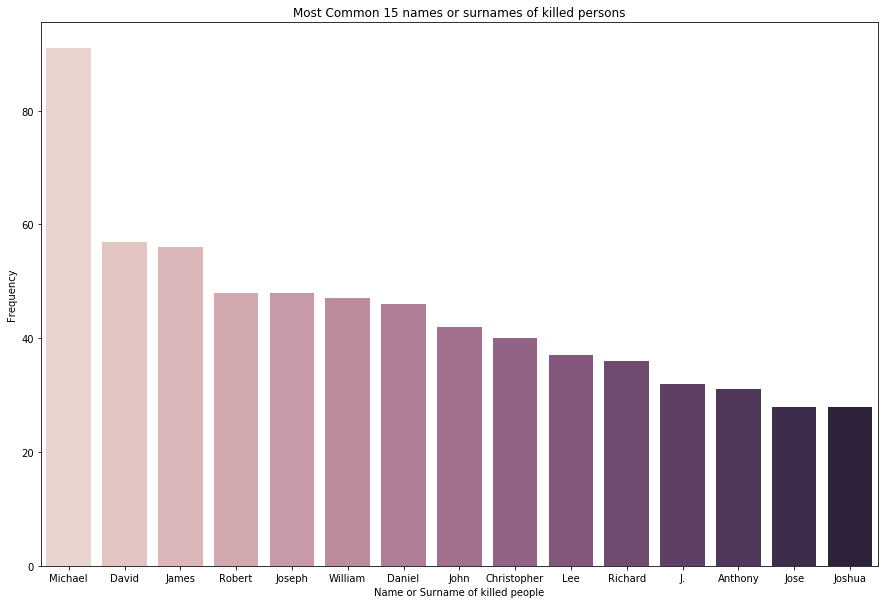

In [79]:
plt.figure(figsize=(15,10))
ax=sns.barplot(x=x,y=y,palette=sns.cubehelix_palette(len(x))) #similar to c in matplotlib
#colors are defined at the individual row level
plt.xlabel("Name or Surname of killed people")
plt.ylabel("Frequency")
plt.title("Most Common 15 names or surnames of killed persons")

In [82]:
percent_over_25_completed_highSchool.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [85]:
# High School graudation rate of the population that is older than 25 in states
percent_over_25_completed_highSchool.percent_completed_hs.replace(['-'],0.0,inplace=True)
# This is for replacing the missing values 
percent_over_25_completed_highSchool.percent_completed_hs=percent_over_25_completed_highSchool.percent_completed_hs.astype(float)
area_highschool=[]
area_highschool=percent_over_25_completed_highSchool.groupby("Geographic Area").mean()
area_highschool.columns=["area_highschool_ratio"]
data=area_highschool

Text(0.5,1,"Percentage of Given State's population above 25 that has HS certificate")

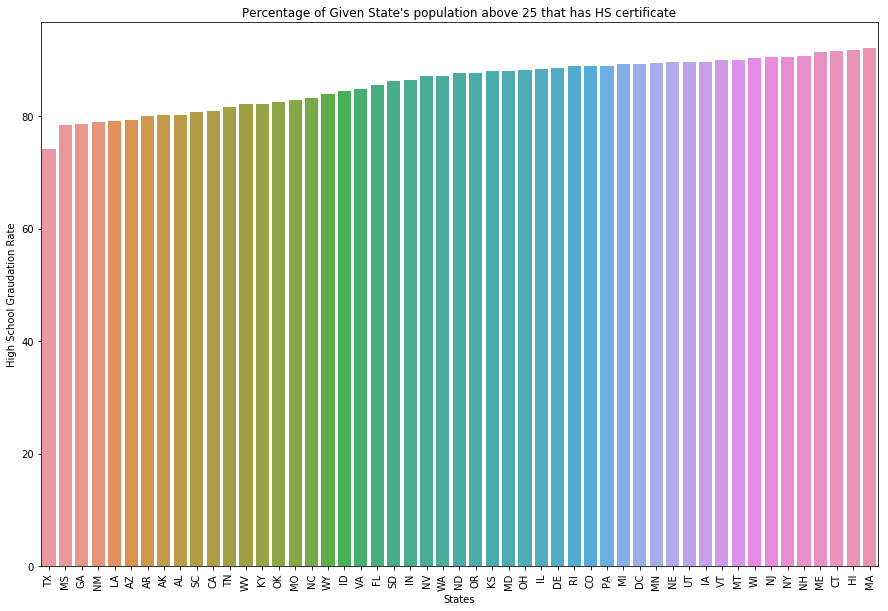

In [86]:
new_index=(data["area_highschool_ratio"].sort_values(ascending=True)).index.values
sorted_data2=data.reindex(new_index)
plt.figure(figsize=(15,10))
ax=sns.barplot(x=sorted_data2.index,y=sorted_data2.area_highschool_ratio)
plt.xticks(rotation=90)
plt.xlabel("States")
plt.ylabel("High School Graudation Rate")
plt.title("Percentage of Given State's population above 25 that has HS certificate")

In [88]:
# Percentage of state's population according to races that are different 
share_race_city.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [90]:
share_race_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
Geographic area          29268 non-null object
City                     29268 non-null object
share_white              29268 non-null object
share_black              29268 non-null object
share_native_american    29268 non-null object
share_asian              29268 non-null object
share_hispanic           29268 non-null object
dtypes: object(7)
memory usage: 1.6+ MB


In [93]:
share_race_city.replace(['-'],0.0,inplace=True)
share_race_city.replace(['(X)'],0.0,inplace=True)
share_race_city.share_white=share_race_city.share_white.astype(float)
share_race_city.share_black=share_race_city.share_black.astype(float)
share_race_city.share_native_american=share_race_city.share_native_american.astype(float)
share_race_city.share_asian=share_race_city.share_asian.astype(float)
share_race_city.share_hispanic=share_race_city.share_hispanic.astype(float)
data=share_race_city.groupby("Geographic area").mean()
data.head()

,share_white,share_black,share_native_american,share_asian,share_hispanic
Geographic area,,,,,
AK,45.264225,0.562535,45.477183,1.376620,2.130986
AL,72.507266,23.322318,0.659343,0.479758,2.980104
AR,78.449538,16.296858,0.759889,0.477079,4.273013
AZ,59.929047,0.954545,28.589800,0.726608,20.144568
CA,71.535982,2.679645,1.715167,5.542613,29.513592


In [95]:
data.shape[1]

5

[Text(0,0.5,'States'),
 Text(0.5,0,'Percentage of Races'),
 Text(0.5,1,"Percentage of State's population of races")]

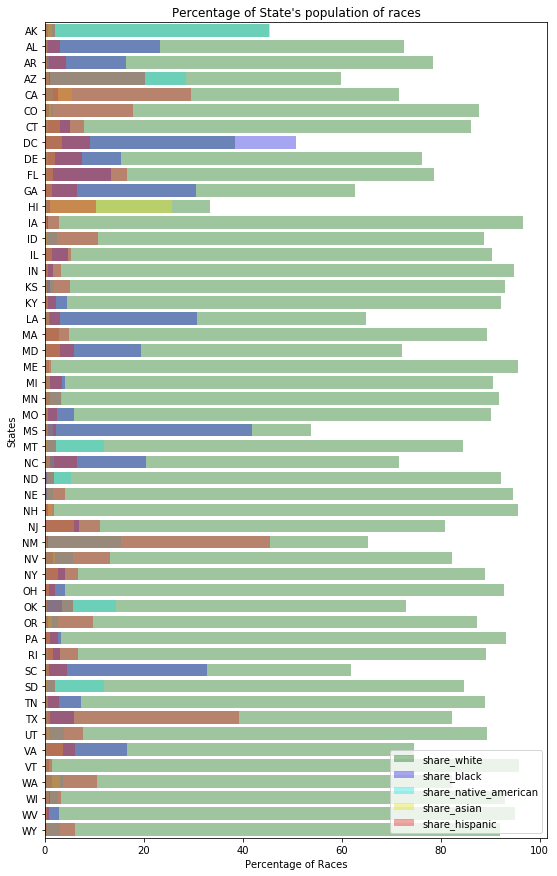

In [101]:
f,ax=plt.subplots(figsize=(9,15))
colors=["green","blue","cyan","yellow","red"]
labels=list(data.columns)
for i in np.arange(data.shape[1]):
    sns.barplot(y=data.index,x=data.iloc[:,i],color=colors[i],
                alpha=0.4,label=labels[i])

ax.legend(loc="lower right",frameon=True) 
ax.set(xlabel="Percentage of Races",ylabel="States",title="Percentage of State's population of races")

#What is set used here? 

In [ ]:
# HIgh School Graudation rate vs poverty state of each state
